---
# COMP1804 Coursework - Mohamed Adnan - 001291868

---

This notebook analyses different ML models on thier performance by testing it on a dataset of road accidents. Each model will predict the fatality of the accidents and thier performance will be compared with modern ANN model.
___


# 1.Loading Dataset

**1.1 Import modules** 

In [64]:
import numpy as np # numpy is a library that allows us to work with vectors and matrices
import matplotlib.pyplot as plt # visualisation library
import pandas as pd # pandas is a library that allows us to work with DataFrames 
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestNeighbors
from scipy import stats
from sklearn.metrics import balanced_accuracy_score
from time import time as tt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
np.random.seed(0)
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, accuracy_score
import seaborn as sns



In [65]:
from google.colab import files
import io

uploaded = files.upload()    # Will prompt you to select file
train_dataset = pd.read_csv(io.BytesIO(uploaded['OPTION1_uk_road_accident_2019_coursework_final - OPTION1_uk_road_accident_2019_coursework_final.csv']))

Saving OPTION1_uk_road_accident_2019_coursework_final - OPTION1_uk_road_accident_2019_coursework_final.csv to OPTION1_uk_road_accident_2019_coursework_final - OPTION1_uk_road_accident_2019_coursework_final (1).csv


In [66]:
print(train_dataset.head(10))

  accident_index  speed_limit light_conditions weather_conditions  \
0  2019010225080           30         darkness              other   
1  2019200908684           30         darkness               fine   
2  2019040860897           40         daylight               fine   
3  2019460847205           40         daylight               fine   
4  2019051911581           30         daylight               fine   
5  2019400862270           60         daylight               fine   
6  2019420894599           30         darkness               fine   
7  2019010162791           50         daylight               fine   
8  2019360909153           60         daylight               fine   
9  2019500856761           60         daylight               fine   

  road_surface_conditions        vehicle_type  \
0             wet or damp    at least one van   
1                     dry           only cars   
2                     dry           only cars   
3                     dry           only car

In [67]:
print(train_dataset.describe())

        speed_limit  age_of_oldest_driver
count  31647.000000          25197.000000
mean      36.572029             47.254038
std       13.837362             16.779656
min       -1.000000              6.000000
25%       30.000000             34.000000
50%       30.000000             47.000000
75%       40.000000             59.000000
max       70.000000            101.000000


In [68]:
print(train_dataset.shape)


(31647, 14)


In [69]:
print(train_dataset.columns)

Index(['accident_index', 'speed_limit', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'vehicle_type',
       'junction_location', 'skidding_and_overturning',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'sex_of_driver', 'age_of_oldest_driver',
       'accident_severity'],
      dtype='object')


In [70]:
train_dataset.sample(10)

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
6476,2019521901789,20,daylight,fine,dry,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,44.0,serious
12483,2019010175344,30,daylight,fine,dry,only cars,at or within 20 metres of junction,data missing or out of range,data missing or out of range,data missing or out of range,data missing or out of range,male and female,59.0,slight
2917,2019110845981,30,daylight,fine,dry,biped and van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,60.0,fatal
19767,2019320190146,60,daylight,fine,dry,only cars,not at or within 20 metres of junction,at least one vehicle skidded or overturned,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all females,46.0,fatal
8725,2019010164786,30,daylight,fine,dry,at least one biped,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,27.0,serious
11251,2019420856288,30,daylight,fine,dry,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,44.0,slight
19544,201t1369p0357,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,40.0,NaN
25388,2019010201572,30,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,74.0,slight
4467,201t950000623,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,61.0,NaN
22,2019121901467,30,daylight,fine,dry,at least one biped,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,34.0,slight


# 2.EDA

### **2.1 Checking the dataset** 

In [71]:
print(train_dataset.columns)

Index(['accident_index', 'speed_limit', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'vehicle_type',
       'junction_location', 'skidding_and_overturning',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'sex_of_driver', 'age_of_oldest_driver',
       'accident_severity'],
      dtype='object')


In [72]:
from IPython.display import HTML
def pretty_print_df(value_counts_):
  "Quick function to display value counts more nicely"
  display(HTML(pd.DataFrame(value_counts_).to_html()))

### **2.2 Checking the occurances of values** 

In [73]:
categorical_columns= ['speed_limit', 'light_conditions', 'weather_conditions', 'road_surface_conditions',
       'vehicle_type', 'junction_location', 'skidding_and_overturning','vehicle_leaving_carriageway','hit_object_off_carriageway','first_point_of_impact',
       'accident_severity'
       ]

for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(train_dataset[col].value_counts())
  print()

Categories and number of occurrences for 'speed_limit'


,speed_limit
30,18682
60,4186
20,3222
40,2714
70,1595
50,1223
-1,25



Categories and number of occurrences for 'light_conditions'


,light_conditions
daylight,22210
darkness,9437



Categories and number of occurrences for 'weather_conditions'


,weather_conditions
fine,25152
other,5407
data missing or out of range,970
fog or mist,118



Categories and number of occurrences for 'road_surface_conditions'


,road_surface_conditions
dry,22092
wet or damp,8761
other,374
data missing or out of range,365
flood over 3cm. deep,55



Categories and number of occurrences for 'vehicle_type'


,vehicle_type
only cars,17487
at least one biped,8662
at least one van,4040
biped and van,1000
other,395
data missing or out of range,63



Categories and number of occurrences for 'junction_location'


,junction_location
at or within 20 metres of junction,17204
not at or within 20 metres of junction,12973
data missing or out of range,1470



Categories and number of occurrences for 'skidding_and_overturning'


,skidding_and_overturning
no skidding or overturning,24387
at least one vehicle skidded or overturned,5226
data missing or out of range,2034



Categories and number of occurrences for 'vehicle_leaving_carriageway'


,vehicle_leaving_carriageway
none leaving carriageway,24019
at least one vehicle leaving carriageway,5661
data missing or out of range,1967



Categories and number of occurrences for 'hit_object_off_carriageway'


,hit_object_off_carriageway
none hit an object,26129
at least one vehicle hit an object,3655
data missing or out of range,1863



Categories and number of occurrences for 'first_point_of_impact'


,first_point_of_impact
at least one vehicle with frontal impact,23002
other points of impact,6008
no impact,1333
data missing or out of range,1304



Categories and number of occurrences for 'accident_severity'


,accident_severity
slight,12672
serious,11592
fatal,6159
Serious,25
Slight,19
Fatal,8


### **2.3 Replacing values to be consistant** 

In [74]:
# replace 'yes' with 'Yes' for 'self_employed'
# remember that .loc is a way to access a subset of the dataframe
# We can write df.loc[condition_A, condition_B] where condition_A determines
# which rows we select and condition_B determines which columns we select
train_dataset.loc[train_dataset.accident_severity=='serious','accident_severity'] = 'Serious'
train_dataset.loc[train_dataset.accident_severity=='fatal','accident_severity'] = 'Fatal'
train_dataset.loc[train_dataset.accident_severity=='slight','accident_severity'] = 'Slight'

# replace negative loan amount values with NaN 
# (we use np.nan because that's how the other missing values are represented in this dataset)
train_dataset.loc[train_dataset.speed_limit<0,'speed_limit'] = np.nan

# replace out of scope Property_Area values with NaN
# accepted_property_areas = ['Urban','Rural','Semiurban']
# remember the lambda notation: it is an anonymous function that lets us specificy
# a given (and easy) transformation for its input (in this case, x)
# train_dataset.loc[train_dataset.Property_Area.map(lambda x: x not in accepted_property_areas),'Property_Area'] = np.nan


In [75]:
train_dataset.loc[train_dataset.weather_conditions.map(lambda x: x=='data missing or out of range'),'weather_conditions'] = np.nan
train_dataset.loc[train_dataset.road_surface_conditions.map(lambda x: x=='data missing or out of range'),'road_surface_conditions'] = np.nan
train_dataset.loc[train_dataset.vehicle_type.map(lambda x: x=='data missing or out of range'),'vehicle_type'] = np.nan
train_dataset.loc[train_dataset.junction_location.map(lambda x: x=='data missing or out of range'),'junction_location'] = np.nan
train_dataset.loc[train_dataset.skidding_and_overturning.map(lambda x: x=='data missing or out of range'),'skidding_and_overturning'] = np.nan
train_dataset.loc[train_dataset.vehicle_leaving_carriageway.map(lambda x: x=='data missing or out of range'),'vehicle_leaving_carriageway'] = np.nan
train_dataset.loc[train_dataset.hit_object_off_carriageway.map(lambda x: x=='data missing or out of range'),'hit_object_off_carriageway'] = np.nan

train_dataset.loc[train_dataset.first_point_of_impact.map(lambda x: x=='data missing or out of range'),'first_point_of_impact'] = np.nan






In [76]:
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(train_dataset[col].value_counts())
  print()

Categories and number of occurrences for 'speed_limit'


,speed_limit
30.0,18682
60.0,4186
20.0,3222
40.0,2714
70.0,1595
50.0,1223



Categories and number of occurrences for 'light_conditions'


,light_conditions
daylight,22210
darkness,9437



Categories and number of occurrences for 'weather_conditions'


,weather_conditions
fine,25152
other,5407
fog or mist,118



Categories and number of occurrences for 'road_surface_conditions'


,road_surface_conditions
dry,22092
wet or damp,8761
other,374
flood over 3cm. deep,55



Categories and number of occurrences for 'vehicle_type'


,vehicle_type
only cars,17487
at least one biped,8662
at least one van,4040
biped and van,1000
other,395



Categories and number of occurrences for 'junction_location'


,junction_location
at or within 20 metres of junction,17204
not at or within 20 metres of junction,12973



Categories and number of occurrences for 'skidding_and_overturning'


,skidding_and_overturning
no skidding or overturning,24387
at least one vehicle skidded or overturned,5226



Categories and number of occurrences for 'vehicle_leaving_carriageway'


,vehicle_leaving_carriageway
none leaving carriageway,24019
at least one vehicle leaving carriageway,5661



Categories and number of occurrences for 'hit_object_off_carriageway'


,hit_object_off_carriageway
none hit an object,26129
at least one vehicle hit an object,3655



Categories and number of occurrences for 'first_point_of_impact'


,first_point_of_impact
at least one vehicle with frontal impact,23002
other points of impact,6008
no impact,1333



Categories and number of occurrences for 'accident_severity'


,accident_severity
Slight,12691
Serious,11617
Fatal,6167


In [77]:
train_dataset.head(5)

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30.0,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,Serious
1,2019200908684,30.0,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,Fatal
2,2019040860897,40.0,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,Serious
3,2019460847205,40.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,Serious
4,2019051911581,30.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,Slight


### **2.4 Checking the empty data points** 

In [78]:
train_dataset.isna().sum()

accident_index                    0
speed_limit                      25
light_conditions                  0
weather_conditions              970
road_surface_conditions         365
vehicle_type                     63
junction_location              1470
skidding_and_overturning       2034
vehicle_leaving_carriageway    1967
hit_object_off_carriageway     1863
first_point_of_impact          1304
sex_of_driver                     0
age_of_oldest_driver           6450
accident_severity              1172
dtype: int64

### **2.5 Filling data where appropriate** 

We are only filling data from columns which has very less missing data as over filling from other columns may impact the model in adverse way.

In [79]:
train_dataset.isna().sum()

accident_index                    0
speed_limit                      25
light_conditions                  0
weather_conditions              970
road_surface_conditions         365
vehicle_type                     63
junction_location              1470
skidding_and_overturning       2034
vehicle_leaving_carriageway    1967
hit_object_off_carriageway     1863
first_point_of_impact          1304
sex_of_driver                     0
age_of_oldest_driver           6450
accident_severity              1172
dtype: int64

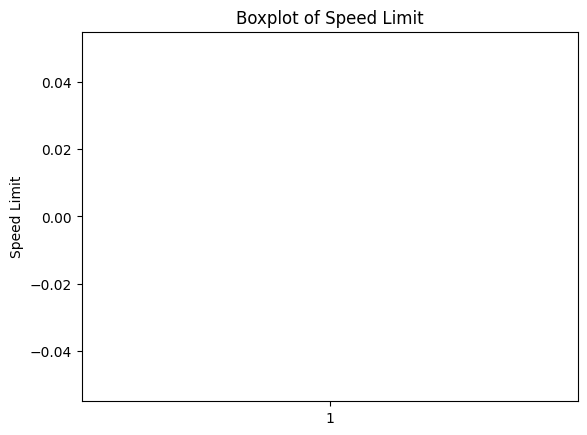

In [80]:
import matplotlib.pyplot as plt

# Select the speed_limit column
speed_limit = train_dataset['speed_limit']

# Create a boxplot of the speed_limit column
fig, ax = plt.subplots()
ax.boxplot(speed_limit)

# Set the title and labels
ax.set_title('Boxplot of Speed Limit')
ax.set_ylabel('Speed Limit')

# Show the plot
plt.show()

### **2.6 Removing the missing data rows** 

In [81]:
# remove all rows with missing data
# dropna removes all rows that contain at least one missing value
print(f'Original dataset length: {len(train_dataset)}')
reduced_train_dataset = train_dataset.dropna()
print(f'Dataset length after removing missing rows: {len(reduced_train_dataset)}')
print()
# print(reduced_train_dataset[['Loan_ID']].head(5)) #let's print only the Loan_ID column
train_dataset.head(5)
# Look at the Loan_ID column: note how the rows order has changed because we dropped the first one!


Original dataset length: 31647
Dataset length after removing missing rows: 23231



,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30.0,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,Serious
1,2019200908684,30.0,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,Fatal
2,2019040860897,40.0,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,Serious
3,2019460847205,40.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,Serious
4,2019051911581,30.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,Slight


In [82]:
reduced_train_dataset.sample(15)

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
24221,2019460881086,40.0,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,62.0,Slight
17543,201931b123819,30.0,daylight,fine,wet or damp,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,male and female,42.0,Slight
3102,2019950867081,30.0,daylight,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,no impact,data missing or out of range,21.0,Slight
12900,2019220892713,30.0,darkness,other,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,no impact,data missing or out of range,34.0,Serious
14803,2019370836078,60.0,darkness,fine,dry,at least one van,not at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,30.0,Fatal
5217,2019530891327,30.0,daylight,other,wet or damp,only cars,not at or within 20 metres of junction,at least one vehicle skidded or overturned,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,20.0,Serious
29805,2019480911529,20.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,45.0,Slight
30143,2019170m11029,20.0,darkness,fine,dry,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,21.0,Slight
17301,2019551900916,30.0,daylight,fine,dry,at least one van,at or within 20 metres of junction,at least one vehicle skidded or overturned,none leaving carriageway,none hit an object,other points of impact,male and female,82.0,Slight
30002,2019621901083,30.0,daylight,fine,dry,at least one biped,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,30.0,Serious



### **2.7 Finding and removing duplicates** 

In [83]:
# any duplicates? Doesn't seem like it...
duplicates = reduced_train_dataset.duplicated()
duplicates.sum()

922

In [84]:
# removing duplicates
# reduced_train_dataset = reduced_train_dataset.drop_duplicates()


### **2.8 Removing unrelated columns** 

In [85]:
# remove multiple selected columns

reduced_train_dataset =reduced_train_dataset.drop(["accident_index","sex_of_driver", "age_of_oldest_driver"], axis=1)

# 3.Encoding

#### 3.1 Converting to categorical data to numerical

In [86]:
#note we are using the dataset with no missing values
temp_dataset = reduced_train_dataset #since this is not the final transformation, we make a copy and use a temporary variable name


# encode categorical data for the 'Gender' column
from sklearn.preprocessing import LabelEncoder
# create an object of the LabelEncoder class
lblEncoder_X = LabelEncoder()   
# apply LblEncoder object to our categorical variables (columns - 'Gender') using the fit_transform method. This returns the column encoded.
temp_dataset['light_conditions'] = lblEncoder_X.fit_transform(temp_dataset['light_conditions'])
temp_dataset['weather_conditions'] = lblEncoder_X.fit_transform(temp_dataset['weather_conditions'])
temp_dataset['road_surface_conditions'] = lblEncoder_X.fit_transform(temp_dataset['road_surface_conditions'])
temp_dataset['vehicle_type'] = lblEncoder_X.fit_transform(temp_dataset['vehicle_type'])
temp_dataset['junction_location'] = lblEncoder_X.fit_transform(temp_dataset['junction_location'])
temp_dataset['skidding_and_overturning'] = lblEncoder_X.fit_transform(temp_dataset['skidding_and_overturning'])
temp_dataset['vehicle_leaving_carriageway'] = lblEncoder_X.fit_transform(temp_dataset['vehicle_leaving_carriageway'])
temp_dataset['hit_object_off_carriageway'] = lblEncoder_X.fit_transform(temp_dataset['hit_object_off_carriageway'])
temp_dataset['first_point_of_impact'] = lblEncoder_X.fit_transform(temp_dataset['first_point_of_impact'])

# printing the value counts will show the encoded labels, instead of the original ones
print(temp_dataset['light_conditions'].value_counts())





1    16458
0     6773
Name: light_conditions, dtype: int64


In [87]:
corr = temp_dataset.corr()
# The line below controls some visual aspects of the plot.
# Note that I've chosen a "perceptually uniform colormap" (the viridis color map) to help the interpretation of the results
corr.style.background_gradient(cmap='viridis', axis=None).set_precision(2)

<ipython-input-87-25a3910104a0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = temp_dataset.corr()
<ipython-input-87-25a3910104a0>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='viridis', axis=None).set_precision(2)


,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact
speed_limit,1.00,-0.04,0.03,0.07,0.11,0.31,-0.27,-0.35,-0.27,-0.00
light_conditions,-0.04,1.00,-0.17,-0.24,-0.10,-0.03,0.07,0.10,0.11,0.04
weather_conditions,0.03,-0.17,1.00,0.64,0.06,0.01,-0.08,-0.06,-0.05,-0.01
road_surface_conditions,0.07,-0.24,0.64,1.00,0.10,0.03,-0.13,-0.10,-0.09,-0.02
vehicle_type,0.11,-0.10,0.06,0.10,1.00,0.11,0.01,-0.16,-0.17,-0.01
junction_location,0.31,-0.03,0.01,0.03,0.11,1.00,-0.15,-0.20,-0.17,0.11
skidding_and_overturning,-0.27,0.07,-0.08,-0.13,0.01,-0.15,1.00,0.35,0.28,-0.04
vehicle_leaving_carriageway,-0.35,0.10,-0.06,-0.10,-0.16,-0.20,0.35,1.00,0.74,0.01
hit_object_off_carriageway,-0.27,0.11,-0.05,-0.09,-0.17,-0.17,0.28,0.74,1.00,0.01
first_point_of_impact,-0.00,0.04,-0.01,-0.02,-0.01,0.11,-0.04,0.01,0.01,1.00


In [88]:
temp_dataset.sample(5)

,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,accident_severity
10929,40.0,1,0,0,1,0,1,1,1,0,Slight
28023,30.0,1,2,3,3,1,1,1,1,0,Slight
15783,30.0,1,0,0,3,0,1,1,1,2,Slight
5711,30.0,1,2,3,0,1,1,1,1,0,Serious
9750,30.0,1,0,0,3,0,1,1,1,0,Serious


### 3.3 Label encoding


In [89]:
from sklearn.preprocessing import LabelEncoder

# create an object of the LabelEncoder class
lblEncoder_Y = LabelEncoder()   

# apply LblEncoder object to our target variables
temp_dataset['accident_severity'] = lblEncoder_Y.fit_transform(temp_dataset['accident_severity']) 
print(temp_dataset.head(5))


   speed_limit  light_conditions  weather_conditions  road_surface_conditions  \
0         30.0                 0                   2                        3   
1         30.0                 0                   0                        0   
4         30.0                 1                   0                        0   
6         30.0                 0                   0                        3   
7         50.0                 1                   0                        0   

   vehicle_type  junction_location  skidding_and_overturning  \
0             1                  0                         1   
1             3                  0                         1   
4             3                  1                         1   
6             3                  1                         1   
7             3                  0                         1   

   vehicle_leaving_carriageway  hit_object_off_carriageway  \
0                            1                           1   
1   

### 3.2 Balancing

In [90]:
# Check whether the problem is unbalance
# That is, check whether some target labels are (much) more common than others
# training dataset
sampleClassBias = train_dataset['accident_severity'].value_counts()
print('Training Labels distribution:')
pretty_print_df(sampleClassBias)


Training Labels distribution:


,accident_severity
Slight,12691
Serious,11617
Fatal,6167


In [91]:
# compute class weights to counteract data imbalance
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
    class_weight= "balanced", 
    classes = np.unique(temp_dataset['accident_severity']), 
    y = temp_dataset['accident_severity'])

# we turn the weights into a dictionary
class_weights = dict(zip(np.unique(temp_dataset['accident_severity']), class_weights))

# Let's print the results
# note that encoded label 0 corresponds to the original label 'N': there are fewer instances of 'N' so this class is given a higher weight in the loss function
print(class_weights)

{0: 1.5340068674062335, 1: 0.8515138186349974, 2: 0.8519822496057505}


In [92]:
corr = temp_dataset.corr()
# The line below controls some visual aspects of the plot.
# Note that I've chosen a "perceptually uniform colormap" (the viridis color map) to help the interpretation of the results
corr.style.background_gradient(cmap='viridis', axis=None).set_precision(2)

<ipython-input-92-25a3910104a0>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='viridis', axis=None).set_precision(2)


,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,accident_severity
speed_limit,1.00,-0.04,0.03,0.07,0.11,0.31,-0.27,-0.35,-0.27,-0.00,-0.41
light_conditions,-0.04,1.00,-0.17,-0.24,-0.10,-0.03,0.07,0.10,0.11,0.04,0.37
weather_conditions,0.03,-0.17,1.00,0.64,0.06,0.01,-0.08,-0.06,-0.05,-0.01,-0.07
road_surface_conditions,0.07,-0.24,0.64,1.00,0.10,0.03,-0.13,-0.10,-0.09,-0.02,-0.11
vehicle_type,0.11,-0.10,0.06,0.10,1.00,0.11,0.01,-0.16,-0.17,-0.01,0.08
junction_location,0.31,-0.03,0.01,0.03,0.11,1.00,-0.15,-0.20,-0.17,0.11,-0.14
skidding_and_overturning,-0.27,0.07,-0.08,-0.13,0.01,-0.15,1.00,0.35,0.28,-0.04,0.19
vehicle_leaving_carriageway,-0.35,0.10,-0.06,-0.10,-0.16,-0.20,0.35,1.00,0.74,0.01,0.20
hit_object_off_carriageway,-0.27,0.11,-0.05,-0.09,-0.17,-0.17,0.28,0.74,1.00,0.01,0.16
first_point_of_impact,-0.00,0.04,-0.01,-0.02,-0.01,0.11,-0.04,0.01,0.01,1.00,0.01


### 3.4 Feature scaling


...



# 4.Comparision using Sklearn Pipeline

In [93]:
temp_dataset

,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,accident_severity
0,30.0,0,2,3,1,0,1,1,1,2,1
1,30.0,0,0,0,3,0,1,0,0,0,0
4,30.0,1,0,0,3,1,1,1,1,0,2
6,30.0,0,0,3,3,1,1,1,1,0,0
7,50.0,1,0,0,3,0,1,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
31641,40.0,0,0,0,3,0,0,1,1,0,0
31642,30.0,0,0,3,0,1,1,1,1,0,1
31643,60.0,1,0,0,4,0,0,1,1,2,1
31644,70.0,1,0,0,1,1,1,1,1,0,2


### 4.1 Importing Libraries related to ML training

In [94]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

### 4.2 Traninig a basline model for comparison

In [95]:


# Define the pipeline for the baseline model
pipeline = Pipeline([('scaler', StandardScaler()), ('dummy', DummyClassifier(strategy='most_frequent'))])

X = temp_dataset.drop(['accident_severity'], axis = 1)
y = temp_dataset['accident_severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the baseline model and add its scores to a dataframe
grid_search = GridSearchCV(pipeline, {}, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
score_df_baseline = pd.DataFrame({
    'Algorithm': 'Baseline',
    'Best Score': grid_search.best_score_,
    'Accuracy': grid_search.score(X_test, y_test),
    'Precision': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['precision'],
    'Recall': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall'],
    'F1 Score': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
}, index=[0])

# Print the score dataframe
pretty_print_df(score_df_baseline)


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

,Algorithm,Best Score,Accuracy,Precision,Recall,F1 Score
0,Baseline,0.394425,0.3796,0.144096,0.3796,0.208895


### 4.3 Training ML alorithms using SciLearn pipeline

--------------------------------------
{'lr'}
Confusion matrix for lr:
[[ 716  224   96]
 [ 256 1274  234]
 [ 188  292 1367]]
Classification report for lr:
              precision    recall  f1-score   support

           0       0.62      0.69      0.65      1036
           1       0.71      0.72      0.72      1764
           2       0.81      0.74      0.77      1847

    accuracy                           0.72      4647
   macro avg       0.71      0.72      0.71      4647
weighted avg       0.73      0.72      0.72      4647



<ipython-input-96-c4660b033d44>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df_ml_algos = score_df_ml_algos.append({


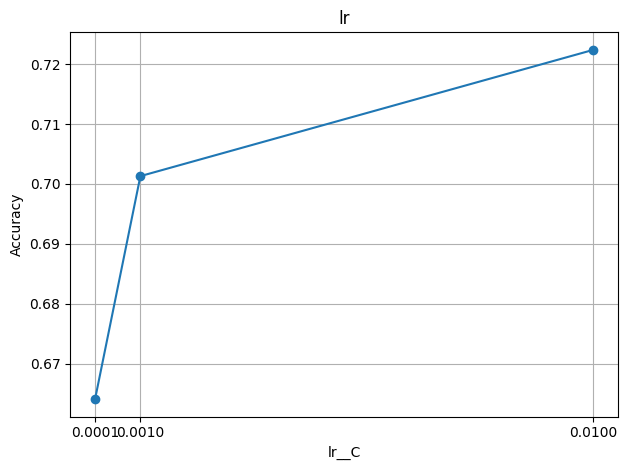

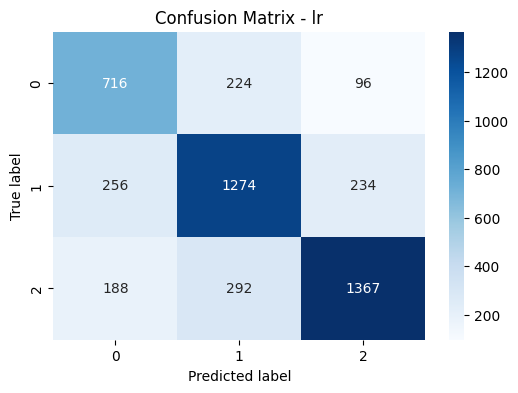

--------------------------------------
--------------------------------------
{'rf'}
Confusion matrix for rf:
[[ 848  125   63]
 [ 308 1231  225]
 [ 225  217 1405]]
Classification report for rf:
              precision    recall  f1-score   support

           0       0.61      0.82      0.70      1036
           1       0.78      0.70      0.74      1764
           2       0.83      0.76      0.79      1847

    accuracy                           0.75      4647
   macro avg       0.74      0.76      0.74      4647
weighted avg       0.76      0.75      0.75      4647



<ipython-input-96-c4660b033d44>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df_ml_algos = score_df_ml_algos.append({


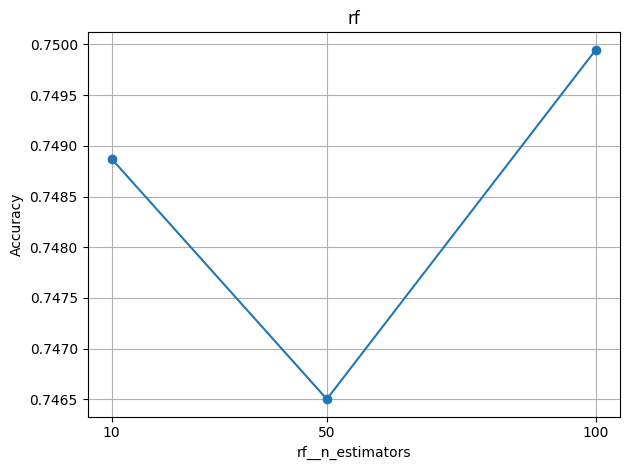

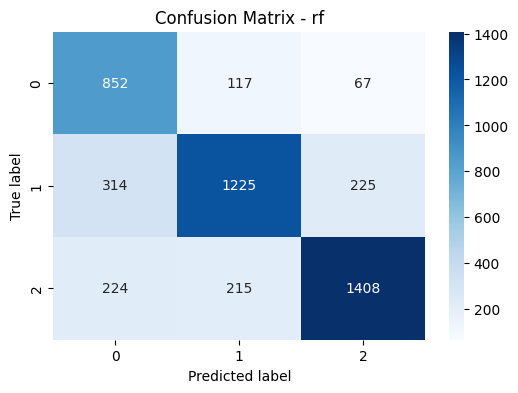

--------------------------------------
--------------------------------------
{'svc'}
Confusion matrix for svc:
[[ 846  110   80]
 [ 311 1220  233]
 [ 223  200 1424]]
Classification report for svc:
              precision    recall  f1-score   support

           0       0.61      0.82      0.70      1036
           1       0.80      0.69      0.74      1764
           2       0.82      0.77      0.79      1847

    accuracy                           0.75      4647
   macro avg       0.74      0.76      0.75      4647
weighted avg       0.77      0.75      0.75      4647



<ipython-input-96-c4660b033d44>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df_ml_algos = score_df_ml_algos.append({


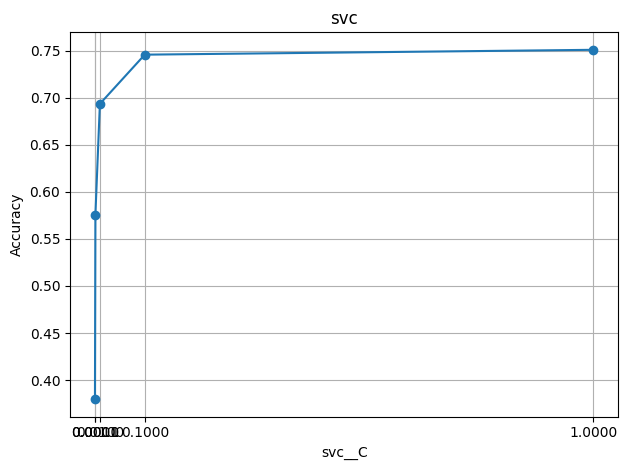

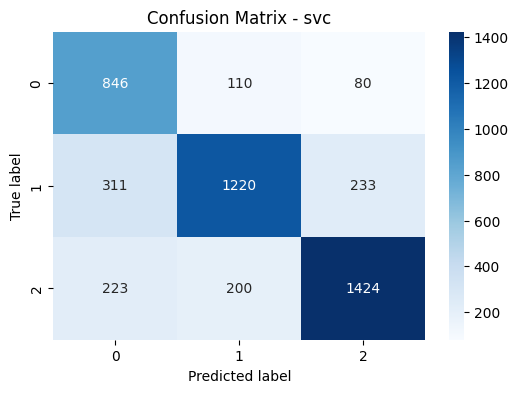

--------------------------------------
--------------------------------------
{'knn'}
Confusion matrix for knn:
[[ 826  137   73]
 [ 307 1226  231]
 [ 207  240 1400]]
Classification report for knn:
              precision    recall  f1-score   support

           0       0.62      0.80      0.70      1036
           1       0.76      0.70      0.73      1764
           2       0.82      0.76      0.79      1847

    accuracy                           0.74      4647
   macro avg       0.73      0.75      0.74      4647
weighted avg       0.75      0.74      0.74      4647



<ipython-input-96-c4660b033d44>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df_ml_algos = score_df_ml_algos.append({


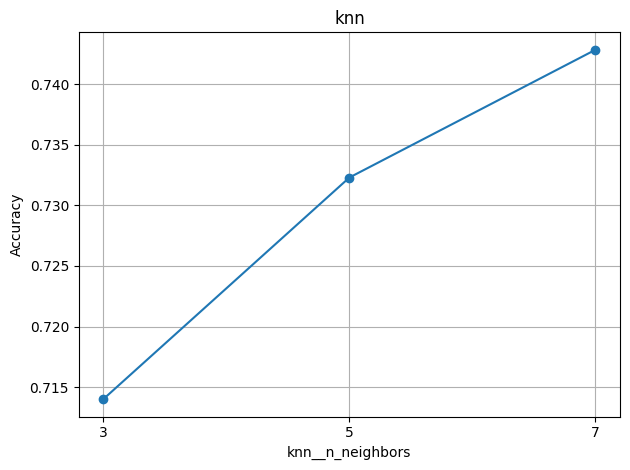

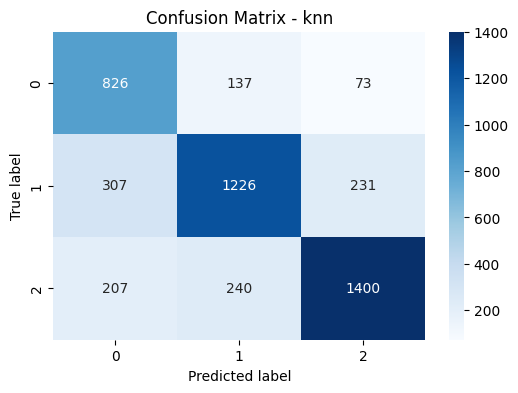

--------------------------------------
--------------------------------------
{'nb'}
Confusion matrix for nb:
[[ 634  297  105]
 [ 311  891  562]
 [ 280  330 1237]]
Classification report for nb:
              precision    recall  f1-score   support

           0       0.52      0.61      0.56      1036
           1       0.59      0.51      0.54      1764
           2       0.65      0.67      0.66      1847

    accuracy                           0.59      4647
   macro avg       0.58      0.60      0.59      4647
weighted avg       0.60      0.59      0.59      4647



<ipython-input-96-c4660b033d44>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df_ml_algos = score_df_ml_algos.append({


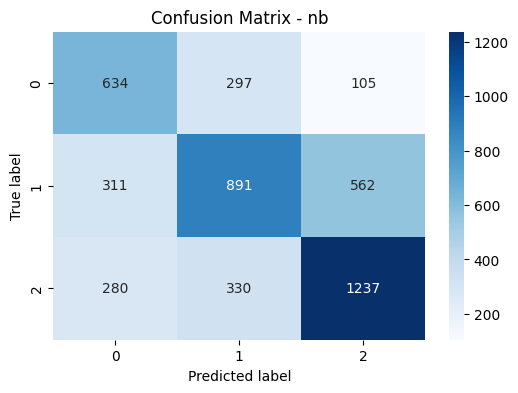

--------------------------------------
--------------------------------------
{'dt'}
Confusion matrix for dt:
[[ 935   67   34]
 [ 347 1205  212]
 [ 243  203 1401]]
Classification report for dt:
              precision    recall  f1-score   support

           0       0.61      0.90      0.73      1036
           1       0.82      0.68      0.74      1764
           2       0.85      0.76      0.80      1847

    accuracy                           0.76      4647
   macro avg       0.76      0.78      0.76      4647
weighted avg       0.78      0.76      0.76      4647



<ipython-input-96-c4660b033d44>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df_ml_algos = score_df_ml_algos.append({


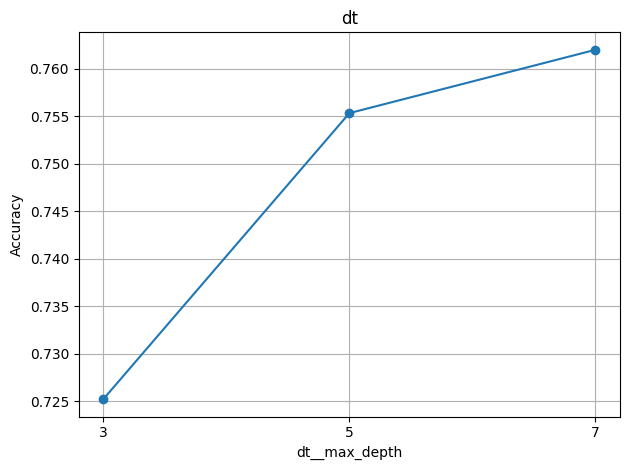

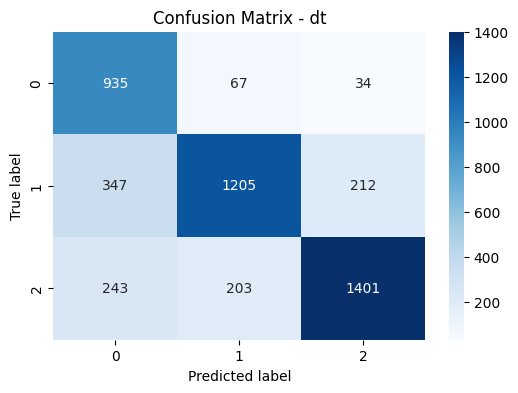

--------------------------------------
  Algorithm                      Best Parameters  Best Score  Accuracy  \
0        lr                      {'lr__C': 0.01}    0.724656  0.722402   
1        rf            {'rf__n_estimators': 100}    0.760062  0.749731   
2       svc  {'svc__C': 1, 'svc__kernel': 'rbf'}    0.755166  0.751022   
3       knn              {'knn__n_neighbors': 7}    0.749246  0.742845   
4        nb                                   {}    0.605628  0.594362   
5        dt                 {'dt__max_depth': 7}    0.772546  0.761997   

   Precision    Recall  F1 Score  
0   0.727951  0.722402  0.724146  
1   0.763811  0.749731  0.751999  
2   0.765199  0.751022  0.753156  
3   0.754300  0.742845  0.744850  
4   0.596415  0.594362  0.593284  
5   0.784896  0.761997  0.763973  


In [96]:


# Define the pipeline for each algorithm
pipelines = {
    'lr': Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())]),
    'rf': Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())]),
    'svc': Pipeline([('scaler', StandardScaler()), ('svc', SVC())]),
    'knn': Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]),
    'nb': Pipeline([('scaler', StandardScaler()), ('nb', GaussianNB())]),
    'dt': Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeClassifier())])
}

# Define the hyperparameters to tune for each algorithm
parameters = {
    'lr': {'lr__C': [0.0001,0.001,0.01]},
    'rf': {'rf__n_estimators': [10, 50, 100]},
    'svc': {'svc__C': [0.0001,0.001,0.01, 0.1, 1],'svc__kernel': ['linear', 'rbf']},
    'knn': {'knn__n_neighbors': [3, 5, 7]},
    'nb': {},
    'dt': {'dt__max_depth': [3, 5, 7]}
}

X = temp_dataset.drop(['accident_severity'], axis = 1)
y = temp_dataset['accident_severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set shared parameters for all algorithms
shared_parameters = {'cv': 5, 'scoring': 'accuracy'}

# Create a dataframe to store the scores for all the algorithms
score_df_ml_algos = pd.DataFrame(columns=['Algorithm', 'Best Parameters', 'Best Score', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Train each algorithm and add its scores to the dataframe
for algo, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, parameters[algo], **shared_parameters)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    print("--------------------------------------")
    print({algo})
    print(f"Confusion matrix for {algo}:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Classification report for {algo}:")
    print(classification_report(y_test, y_pred))
    score_df_ml_algos = score_df_ml_algos.append({
        'Algorithm': algo,
        'Best Parameters': grid_search.best_params_,
        'Best Score': grid_search.best_score_,
        'Accuracy': grid_search.score(X_test, y_test),
        'Precision': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['precision'],
        'Recall': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall'],
        'F1 Score': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    }, ignore_index=True)

    # Plot parameter values for algorithm for each parameters
    if algo != 'nb':
      plt.figure()
      param_name = list(parameters[algo].keys())[0]
      param_values = parameters[algo][param_name]
      param_scores = []
      for param_value in param_values:
          pipeline.set_params(**{f'{param_name}': param_value})
          pipeline.fit(X_train, y_train)
          y_pred = pipeline.predict(X_test)
          param_scores.append(accuracy_score(y_test, y_pred))
      plt.plot(param_values, param_scores, '-o')
      plt.title(algo)
      plt.xlabel(param_name)
      plt.ylabel('Accuracy')
      plt.xticks(param_values)
      plt.grid()
      plt.tight_layout()

    # Plot the confusion matrix as a heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix - {algo}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    len(parameters[algo])!= 0

    
    print("--------------------------------------")

# Print the score dataframe
print(score_df_ml_algos)


In [97]:
print(parameters)
pd.DataFrame(parameters)


{'lr': {'lr__C': [0.0001, 0.001, 0.01]}, 'rf': {'rf__n_estimators': [10, 50, 100]}, 'svc': {'svc__C': [0.0001, 0.001, 0.01, 0.1, 1], 'svc__kernel': ['linear', 'rbf']}, 'knn': {'knn__n_neighbors': [3, 5, 7]}, 'nb': {}, 'dt': {'dt__max_depth': [3, 5, 7]}}


,lr,rf,svc,knn,nb,dt
lr__C,"[0.0001, 0.001, 0.01]",NaN,NaN,NaN,NaN,NaN
rf__n_estimators,NaN,"[10, 50, 100]",NaN,NaN,NaN,NaN
svc__C,NaN,NaN,"[0.0001, 0.001, 0.01, 0.1, 1]",NaN,NaN,NaN
svc__kernel,NaN,NaN,"[linear, rbf]",NaN,NaN,NaN
knn__n_neighbors,NaN,NaN,NaN,"[3, 5, 7]",NaN,NaN
dt__max_depth,NaN,NaN,NaN,NaN,NaN,"[3, 5, 7]"


In [98]:
pretty_print_df(score_df_ml_algos)

,Algorithm,Best Parameters,Best Score,Accuracy,Precision,Recall,F1 Score
0,lr,{'lr__C': 0.01},0.724656,0.722402,0.727951,0.722402,0.724146
1,rf,{'rf__n_estimators': 100},0.760062,0.749731,0.763811,0.749731,0.751999
2,svc,"{'svc__C': 1, 'svc__kernel': 'rbf'}",0.755166,0.751022,0.765199,0.751022,0.753156
3,knn,{'knn__n_neighbors': 7},0.749246,0.742845,0.754300,0.742845,0.744850
4,nb,{},0.605628,0.594362,0.596415,0.594362,0.593284
5,dt,{'dt__max_depth': 7},0.772546,0.761997,0.784896,0.761997,0.763973


In [101]:
pretty_print_df(score_df_baseline)

,Algorithm,Best Score,Accuracy,Precision,Recall,F1 Score
0,Baseline,0.394425,0.3796,0.144096,0.3796,0.208895


# 5.Comparision of ANN models using Keras & Sklearn.

### 5.1 Importing Modules related to training models

In [102]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder


## 5.2 Using KerasClassifier

### *5.2.1 Training -1*

In this initial model is trained without using any gridsearch methods.

In [103]:

# 44444444
X = temp_dataset.drop(['accident_severity'], axis = 1)
y = temp_dataset['accident_severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the TensorFlow Keras model
def create_model(units=20, optimizer='adam'):
    model = Sequential()
    model.add(Dense(units=5, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(units=units, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(units=3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create a scikit-learn pipeline with a TensorFlow Keras model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KerasClassifier(build_fn=create_model, verbose=0))
    
])


history1 = pipeline['model'].fit(X_train, y_train, epochs=40, batch_size=16, verbose=0, validation_data=(X_test, y_test))


# Make predictions using the pipeline
y_pred = pipeline['model'].predict(X_test)


# Generating report for predictions
pred_report_1 = classification_report(y_test, y_pred)
print(pred_report_1)




# Use GridSearchCV to find the best hyperparameters
# grid = GridSearchCV(pipeline, param_grid=param_grid, scoring='accuracy', verbose= True)
# grid.fit(X, y)

# grid.predict(X_test)

# # Print the best hyperparameters
# print(f"Best parameters: {grid.best_params_}")
# print(f"Best accuracy: {pipeline.best_score_:.2f}")

# Fit the pipeline to the training data and validate on the testing data

# history = pipeline['model'].fit(X_train, y_train, epochs=40, batch_size=16, verbose=0, validation_data=(X_test, y_test))


# # Plot the training and validation loss curves
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss Curves')
# plt.legend()
# plt.show()

# #accuracy per epoch
# plt.figure()
# plt.plot(history.history['accuracy'], label='train_accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(loc='lower right')


<ipython-input-103-ea9507d447db>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasClassifier(build_fn=create_model, verbose=0))


146/146 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.61      0.65      0.63      1036
           1       0.72      0.73      0.72      1764
           2       0.81      0.76      0.78      1847

    accuracy                           0.72      4647
   macro avg       0.71      0.71      0.71      4647
weighted avg       0.73      0.72      0.73      4647



### *5.2.2 Training -2*

Here model is grid searched rigorously to find best hyper-parameters

In [ ]:

# 44444444
X = temp_dataset.drop(['accident_severity'], axis = 1)
y = temp_dataset['accident_severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the TensorFlow Keras model
def create_model(units=20, optimizer='adam' ,hidden_layer_nodes = 20 ,learning_rate=0.01, epochs=40):
    model = Sequential()
    model.add(Dense(units=5, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(units=units, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(units=3, activation='softmax'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=optimizer, metrics=['accuracy'],

                  )
    return model

# Create a scikit-learn pipeline with a TensorFlow Keras model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KerasClassifier(
        build_fn=create_model,
        verbose=True,
        
        ))
    
])

# Define the hyperparameters to tune


param_grid = {
    'model__epochs':[40],
    'model__learning_rate': [0.001, 0.01, 0.1],
    'model__hidden_layer_nodes': [20,30,40],
    'model__units':[8,10,12]

}


# Use GridSearchCV to find the best hyperparameters
grid = GridSearchCV(pipeline, param_grid=param_grid, scoring='accuracy', verbose= True, cv = 2)

y_pred = grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_params_)

# Get predictions on the test set
y_pred = grid.predict(X_test)

# Convert one-hot encoded predictions to integer labels
# y_pred = np.argmax(y_pred)
# y_test = np.argmax(y_test)

# # Generating report for predictions
pred_report_4 = classification_report(y_test, y_pred)
print(pred_report_4)











# Use GridSearchCV to find the best hyperparameters
# grid = GridSearchCV(pipeline, param_grid=param_grid, scoring='accuracy', verbose= True)
# grid.fit(X, y)

# grid.predict(X_test)

# Print the best hyperparameters
# print(f"Best parameters: {pipeline.best_params_}")
# print(f"Best accuracy: {pipeline.best_score_:.2f}")


Fitting 2 folds for each of 27 candidates, totalling 54 fits
Epoch 1/40


<ipython-input-104-3ded5ec1c8f0>:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('model', KerasClassifier(


291/291 [==============================] - 1s 2ms/step - loss: 1.0216 - accuracy: 0.4504
Epoch 2/40
291/291 [==============================] - 1s 2ms/step - loss: 0.8846 - accuracy: 0.5616
Epoch 3/40
291/291 [==============================] - 1s 2ms/step - loss: 0.7921 - accuracy: 0.6560
Epoch 4/40
291/291 [==============================] - 0s 2ms/step - loss: 0.7446 - accuracy: 0.6897
Epoch 5/40
291/291 [==============================] - 1s 2ms/step - loss: 0.7174 - accuracy: 0.7277
Epoch 6/40
291/291 [==============================] - 0s 2ms/step - loss: 0.7034 - accuracy: 0.7417
Epoch 7/40
291/291 [==============================] - 1s 2ms/step - loss: 0.6964 - accuracy: 0.7431
Epoch 8/40
291/291 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.7442
Epoch 9/40
291/291 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.7442
Epoch 10/40
291/291 [==============================] - 1s 2ms/step - loss: 0.6836 - accuracy: 0.7444
Epoch 11/4

In [ ]:
print(pred_report_4)


### *5.2.3 Training -3*

model is further fine tuned from the above results

In [ ]:

# 44444444
X = temp_dataset.drop(['accident_severity'], axis = 1)
y = temp_dataset['accident_severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the TensorFlow Keras model
def create_model(units=20, optimizer='adam' ,hidden_layer_nodes = 20 ,learning_rate=0.01, epochs=40):
    model = Sequential()
    model.add(Dense(units=5, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(units=units, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(units=3, activation='softmax'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=optimizer, metrics=['accuracy'],

                  )
    return model

# Create a scikit-learn pipeline with a TensorFlow Keras model
pipeline = Pipeline([
    # ('encoder', OneHotEncoder()),
    ('scaler', StandardScaler()),
    ('model', KerasClassifier(
        build_fn=create_model,
        verbose=True,
        
        ))
    
])

# Define the hyperparameters to tune


param_grid = {
    'model__epochs':[40],
    'model__learning_rate': [ 0.01, 0.02,0.05],
    'model__hidden_layer_nodes': [15,20,25],
    'model__units':[5,8]

}


# Use GridSearchCV to find the best hyperparameters
grid = GridSearchCV(pipeline, param_grid=param_grid, scoring='accuracy', verbose= True, cv = 2 )

y_pred = grid.fit(X_train, y_train )
print(grid.best_score_, grid.best_params_)

# Get predictions on the test set
y_pred = grid.predict(X_test)

# Convert one-hot encoded predictions to integer labels
# y_pred = np.argmax(y_pred)
# y_test = np.argmax(y_test)

# # Generating report for predictions
pred_report_5 = classification_report(y_test, y_pred)
print(pred_report_5)

# # Create a dataframe to store the scores for all the algorithms
# score_df_ml_ann_algos = pd.DataFrame(columns=['Algorithm', 'Best Parameters', 'Best Score', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


# score_df_ml_ann_algos = score_df_ml_ann_algos.append({
#         'Algorithm': 'KerasClassifier',
#         'Best Parameters': grid.best_params_,
#         'Best Score': grid.best_score_,
#         'Accuracy': grid.score(X_test, y_test),
#         'Precision': pred_report_5(y_test, y_pred, output_dict=True)['weighted avg']['precision'],
#         'Recall': pred_report_5(y_test, y_pred, output_dict=True)['weighted avg']['recall'],
#         'F1 Score': pred_report_5(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
#     }, ignore_index=True)











# Use GridSearchCV to find the best hyperparameters
# grid = GridSearchCV(pipeline, param_grid=param_grid, scoring='accuracy', verbose= True)
# grid.fit(X, y)

# grid.predict(X_test)

# Print the best hyperparameters
# print(f"Best parameters: {pipeline.best_params_}")
# print(f"Best accuracy: {pipeline.best_score_:.2f}")


In [ ]:
print(pred_report_5)

In [ ]:
# confusion metric for the final modal
confusion_matrix(y_test, y_pred)

 # Plot the confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title(f'Confusion Matrix - {algo}')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## 5.3 Using MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

X = temp_dataset.drop(['accident_severity'], axis = 1)
y = temp_dataset['accident_severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the pipeline for ANN
ann_pipeline = Pipeline([('scaler', StandardScaler()), ('ann', MLPClassifier(max_iter=1000))])

# Define the hyperparameters to tune for ANN
ann_params = {
    # 'ann__hidden_layer_sizes': [(50,), (100,), (50,50), (100,100)],
              # 'ann__activation': [ 'relu'],
              # 'ann__solver': [ 'adam',],
              'ann__alpha': [0.0001, 0.001, 0.01],
              'ann__learning_rate': ['constant', 'adaptive']}

# Train ANN using GridSearchCV
ann_grid = GridSearchCV(ann_pipeline, param_grid=ann_params, cv=5, scoring='accuracy')
ann_grid.fit(X_train, y_train)
y_pred = ann_grid.predict(X_test)

# Print results
print(f"Best parameters: {ann_grid.best_params_}")
print(f"Accuracy on test set: {ann_grid.score(X_test, y_test)}")
print(f"Classification report:\n{classification_report(y_test, y_pred)}")

pred_report_6 = classification_report(y_test, y_pred)




In [ ]:
# confusion metric for the MLP modal
confusion_matrix(y_test, y_pred)

 # Plot the confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title(f'Confusion Matrix - MLP')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
print(cm)